In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetwork, set_seed

In [2]:
name = 'network_01a'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
load_path = '/home/ADF/ajl573/Data/interstellar_data'

In [3]:
tracks = Tracks()
tracks.load(load_path)

In [4]:
tracks.get_metadata().head()

,file_name,m,Y,FeH,MLT,ov,dif
0,m1.0Y0.24FeH-0.1MLT2.3ov0.0dif1.csv,1.00,0.24,-0.1,2.3,0.0,1
1,m0.92Y0.28FeH-0.3MLT1.7ov0.0dif1.csv,0.92,0.28,-0.3,1.7,0.0,1
2,m0.82Y0.32FeH0.1MLT2.1ov0.0dif1.csv,0.82,0.32,0.1,2.1,0.0,1
3,m0.82Y0.24FeH0.0MLT1.9ov0.0dif1.csv,0.82,0.24,0.0,1.9,0.0,1
4,m1.17Y0.28FeH0.1MLT2.3ov0.0dif1.csv,1.17,0.28,0.1,2.3,0.0,1


In [5]:
tracks.get_data().head()

,evol_stage,initial_mass,initial_Yinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,...,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
0,1,1.0,0.24,-0.1,2.3,1.0,0.036467,0.004031,5788.367004,0.760630,...,-2.318958,0.004365,-0.1,0.082974,-0.066947,-2.171683,0.009821,-0.153525,0.227345,-0.005322
1,1,1.0,0.24,-0.1,2.3,1.0,0.037214,0.004114,5779.922526,0.749957,...,-2.310162,0.004365,-0.1,0.082974,-0.066947,-2.162886,0.009187,-0.155325,0.230036,-0.005332
2,1,1.0,0.24,-0.1,2.3,1.0,0.038109,0.004213,5772.288187,0.741406,...,-2.299835,0.004365,-0.1,0.082974,-0.066947,-2.152559,0.008612,-0.156667,0.232046,-0.005344
3,1,1.0,0.24,-0.1,2.3,1.0,0.039184,0.004332,5766.020545,0.735484,...,-2.287759,0.004365,-0.1,0.082974,-0.066947,-2.140483,0.008141,-0.157465,0.233248,-0.005356
4,1,1.0,0.24,-0.1,2.3,1.0,0.040473,0.004474,5761.544407,0.732361,...,-2.273697,0.004365,-0.1,0.082974,-0.066947,-2.126422,0.007803,-0.157715,0.233634,-0.005372


In [6]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm', 'initial_feh_norm',
          'log_initial_MLT_norm', 'log_initial_Yinit_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'star_feh_norm']

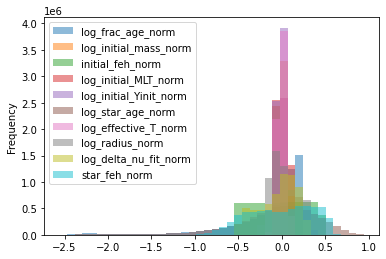

In [7]:
tracks.get_data().plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [8]:
set_seed(101)

In [9]:
train = tracks.sample_data(fraction=1.0, columns=x_cols+y_cols)
train.head()

,log_frac_age_norm,log_initial_mass_norm,initial_feh_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm
5323617,-0.413517,-0.066216,-0.1,0.082974,0.000000,-0.120288,-0.005565,-0.186439,0.241911,-0.047524
4920966,0.165210,0.083546,0.5,0.000000,0.029963,0.151099,-0.074603,0.292163,-0.399585,0.582609
2948371,-0.274013,0.065063,0.0,-0.102662,-0.032185,-0.388351,0.024483,0.018010,0.001718,-0.075572
229413,-0.589022,-0.046245,-0.1,0.082974,0.029963,-0.448385,0.013713,-0.168630,0.224384,-0.032936
1054345,-0.197186,-0.017912,0.4,-0.048305,0.029963,0.090516,-0.034383,-0.105606,0.148063,0.434744


In [10]:
print(f'Length of training data = {len(train)}')

Length of training data = 6454664


In [11]:
depth = 5
width = 128
activation = 'elu'
batch_size = int(0.001 * len(train))
regularization_l2 = 0.0
optimizer = 'nadam'
loss = 'mae'
metrics = ['mse']

In [12]:
network = DenseNetwork(path=save_path, name=name, depth=depth, width=width,
                        activation=activation, batch_size=batch_size, regularization_l2=regularization_l2)

In [13]:
network.load_model()
network.load_history()

In [ ]:
network.train(train, x_cols, y_cols, epochs=5000, validation_split=0.2,
              callbacks=['checkpoint', 'tensorboard'])

In [ ]:
network.save_history()
network.save_model()